In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [5]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [6]:
train[['Pclass','Survived']].groupby(by=['Pclass']).mean().sort_values(by=['Survived'],ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


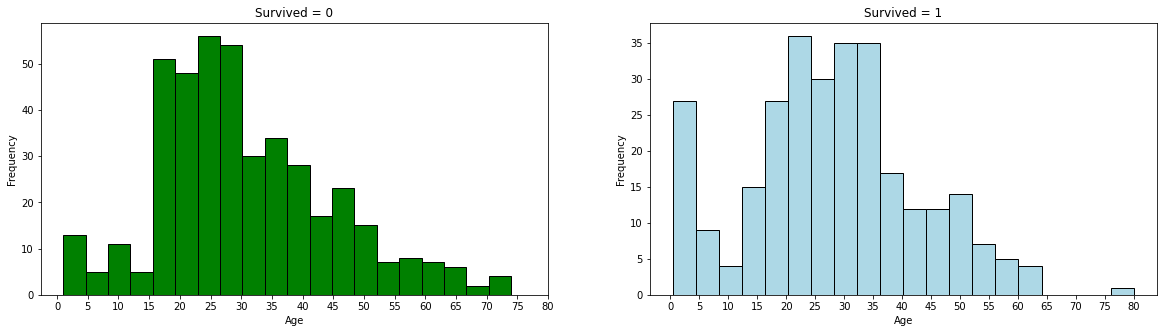

In [7]:
f,ax=plt.subplots(1,2,figsize=(20,5));
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='green')
ax[0].set_title('Survived = 0')
ax[0].set_xlabel('Age')
a=list(range(0,85,5))
ax[0].set_xticks(a)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='lightblue')
ax[1].set_title('Survived = 1')
ax[1].set_xlabel('Age')
b=list(range(0,85,5))
ax[1].set_xticks(b)
plt.show()

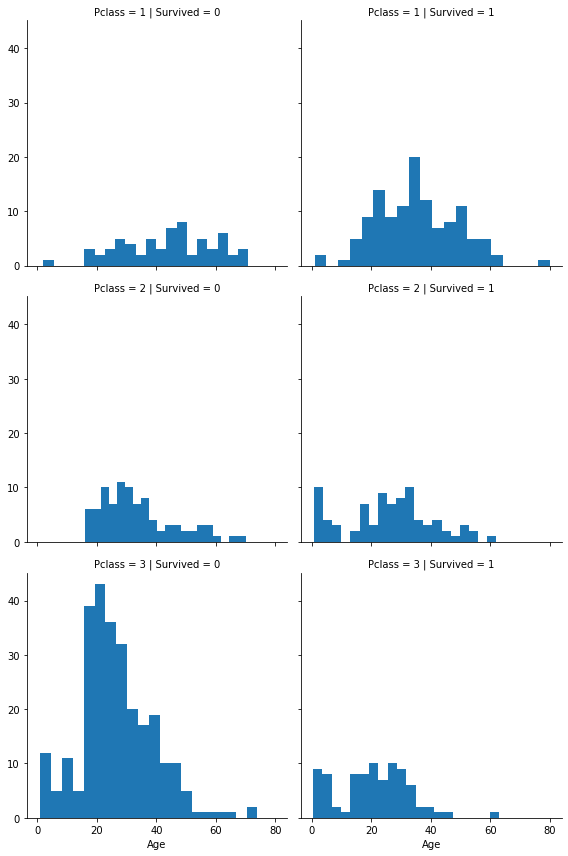

In [8]:
hist = sns.FacetGrid(train, col='Survived', row='Pclass', height=4)
hist.map(plt.hist, 'Age', bins=20)

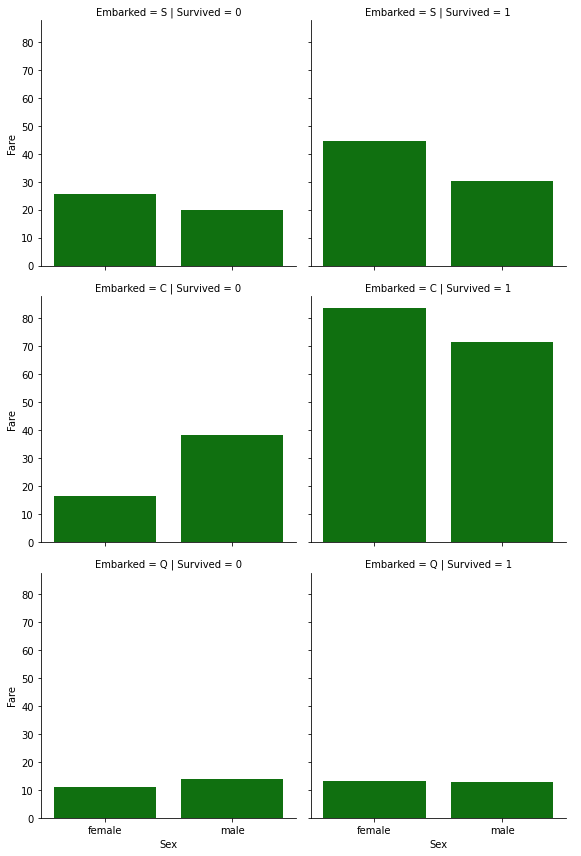

In [9]:
hist = sns.FacetGrid(train, col='Survived', row='Embarked', height=4)
hist.map(sns.barplot, 'Sex','Fare', ci=None, order=['female','male'], color='green') 
hist.add_legend()

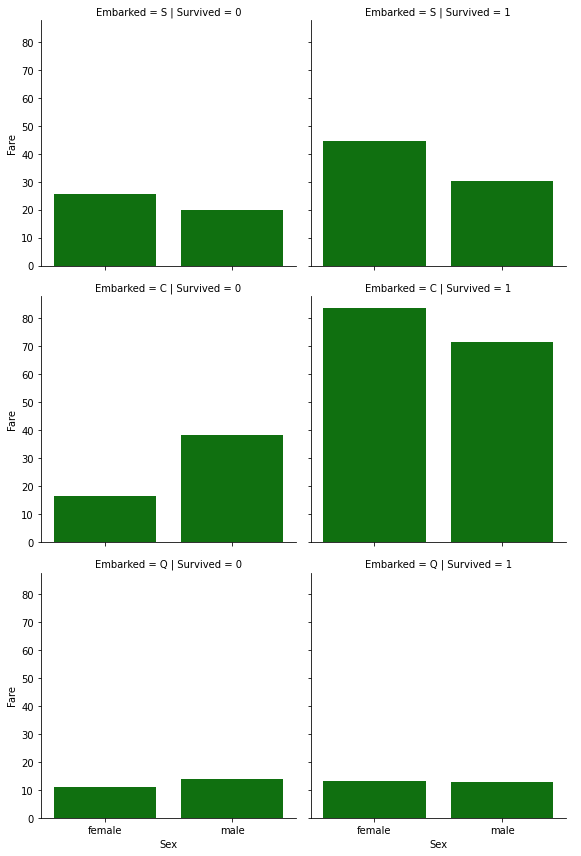

In [10]:
hist = sns.FacetGrid(train, col='Survived', row='Embarked', height=4)
hist.map(sns.barplot, 'Sex','Fare', ci=None, order=['female','male'], color='green') 
hist.add_legend()

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
train['Embarked'] = train['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [14]:
train['Embarked'].fillna( value = train['Embarked'].mode()[0], inplace = True)
m = train['Age'].mean()
s = train['Age'].std()
train['Age'].fillna(value=np.random.randint(m-s,m+s), inplace = True)
m1 = train['Age'].mean()
s1 = train['Age'].std()
test['Age'].fillna(value=np.random.randint(m-s,m+s), inplace = True)

In [15]:
def faretoordinal(f):
  if f > -1 and f <= 7.91:
    return 0
  elif f > 7.91 and f <= 14.545:
    return 1
  elif f > 14.545 and f <= 31:
    return 2
  elif f > 31:
    return 3

train['Fare'] = train['Fare'].apply(faretoordinal)
test['Fare'] = test['Fare'].apply(faretoordinal)

In [16]:
def agetoordinal(A):
  if A > -1 and A <= 4:
    return 0
  elif A > 4 and A <= 15:
    return 1
  elif A > 15 and A <= 25:
    return 2
  elif A > 25 and A <= 40:
    return 3
  elif A > 40 and A <= 80:
    return 4
  elif A > 80:
    return 5

train['Age'] = train['Age'].apply(agetoordinal)
test['Age'] = test['Age'].apply(agetoordinal)

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int64  
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(1), int64(8), object(3)
memory usage: 83.7+ KB


In [19]:
col1 = ['Ticket', 'Cabin','PassengerId' ]
train = train.drop(col1, axis=1)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    int64  
 8   Embarked  891 non-null    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


In [21]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

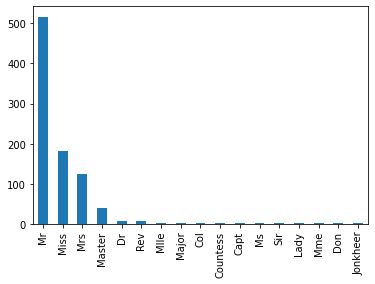

In [22]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train = train.drop(columns='Name')
train['Title'].value_counts().plot(kind='bar');

In [23]:
train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].replace('Mlle', 'Miss')

Text(0, 0.5, 'Passenger count')

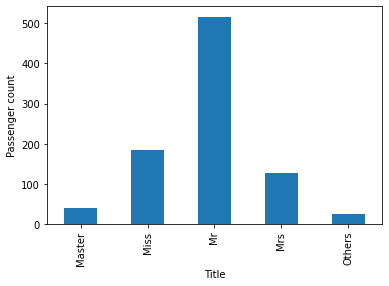

In [24]:
plt = train.Title.value_counts().sort_index().plot(kind='bar');
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

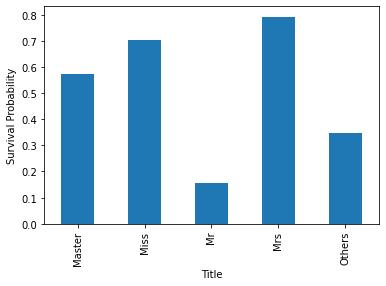

In [25]:
plt = train[['Title', 'Survived']].groupby('Title').mean().Survived.plot(kind='bar');
plt.set_xlabel('Title')
plt.set_ylabel('Survival Probability')

In [26]:
train['Title'] = train['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [27]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,2,1,0,0,2.0,2,2
1,1,1,1,3,1,0,3,0.0,2,3
2,1,3,1,3,0,0,1,2.0,1,1
3,1,1,1,3,1,0,3,2.0,2,3
4,0,3,0,3,0,0,1,2.0,1,2


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    int64  
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    int64  
 7   Embarked    891 non-null    float64
 8   FamilySize  891 non-null    int64  
 9   Title       891 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


In [29]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
Survived,1.000000,-0.338481,0.543351,-0.117640,-0.035322,0.081629,0.303176,-0.167675,0.016639,-0.071174
Pclass,-0.338481,1.000000,-0.131900,-0.154766,0.083081,0.018443,-0.640225,0.162098,0.065997,-0.181177
Sex,0.543351,-0.131900,1.000000,-0.100534,0.114631,0.245489,0.242631,-0.108262,0.200988,-0.060299
Age,-0.117640,-0.154766,-0.100534,1.000000,-0.225506,-0.264852,-0.065972,-0.075167,-0.286442,0.443762
SibSp,-0.035322,0.083081,0.114631,-0.225506,1.000000,0.414838,0.395087,0.068230,0.890712,-0.209813
Parch,0.081629,0.018443,0.245489,-0.264852,0.414838,1.000000,0.392435,0.039798,0.783111,-0.117587
Fare,0.303176,-0.640225,0.242631,-0.065972,0.395087,0.392435,1.000000,-0.096868,0.466082,0.033387
Embarked,-0.167675,0.162098,-0.108262,-0.075167,0.068230,0.039798,-0.096868,1.000000,0.066516,0.005207
FamilySize,0.016639,0.065997,0.200988,-0.286442,0.890712,0.783111,0.466082,0.066516,1.000000,-0.202145
Title,-0.071174,-0.181177,-0.060299,0.443762,-0.209813,-0.117587,0.033387,0.005207,-0.202145,1.000000


In [30]:
test = test.drop(columns=['Ticket', 'PassengerId', 'Cabin'])

In [31]:
test['Sex'] = test['Sex'].map({'male':0, 'female':1})
test['Embarked'] = test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [32]:
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test = test.drop(columns='Name')

test['Title'] = test['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')
test['Title'] = test['Title'].replace('Mlle', 'Miss')

test['Title'] = test['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [33]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,3,0,0,0.0,1,2.0
1,3,1,4,1,0,0.0,2,3.0
2,2,0,4,0,0,1.0,1,2.0
3,3,0,3,0,0,1.0,2,2.0
4,3,1,2,1,1,1.0,2,3.0


In [34]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
Title       1
dtype: int64

In [35]:
test['Title'].fillna( value = test['Title'].mode()[0], inplace = True)

In [36]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
Title       0
dtype: int64

In [37]:
test['Fare'].fillna( value = test['Fare'].mode()[0], inplace = True)

In [38]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [39]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,2,1,0,0,2.0,2,2
1,1,1,1,3,1,0,3,0.0,2,3
2,1,3,1,3,0,0,1,2.0,1,1
3,1,1,1,3,1,0,3,2.0,2,3
4,0,3,0,3,0,0,1,2.0,1,2


In [40]:
train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age             int64
SibSp           int64
Parch           int64
Fare            int64
Embarked      float64
FamilySize      int64
Title           int64
dtype: object

In [41]:
xtrain = train.iloc[:,1:].values
ytrain = train.iloc[:,0].values
xtest = test.iloc[:,:].values

In [42]:
from sklearn.tree import DecisionTreeClassifier
DTclass = DecisionTreeClassifier(criterion = 'gini', max_depth = 4,random_state = 0)
DTclass.fit(xtrain,ytrain)
DTclass.score(xtrain,ytrain)*100

83.83838383838383

In [43]:
from sklearn.model_selection import cross_val_score
crossval = cross_val_score(estimator = DTclass, X = xtrain, y = ytrain, cv = 5)
crossval.mean()*100

81.59563115937483

In [44]:
from sklearn.ensemble import RandomForestClassifier
RFclass = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 4,random_state = 0)
RFclass.fit(xtrain,ytrain)
RFclass.score(xtrain,ytrain)*100

83.5016835016835

In [45]:
crossval_ranf = cross_val_score(estimator = RFclass, X = xtrain, y = ytrain, cv = 5)
crossval_ranf.mean()*100

83.49946644906157

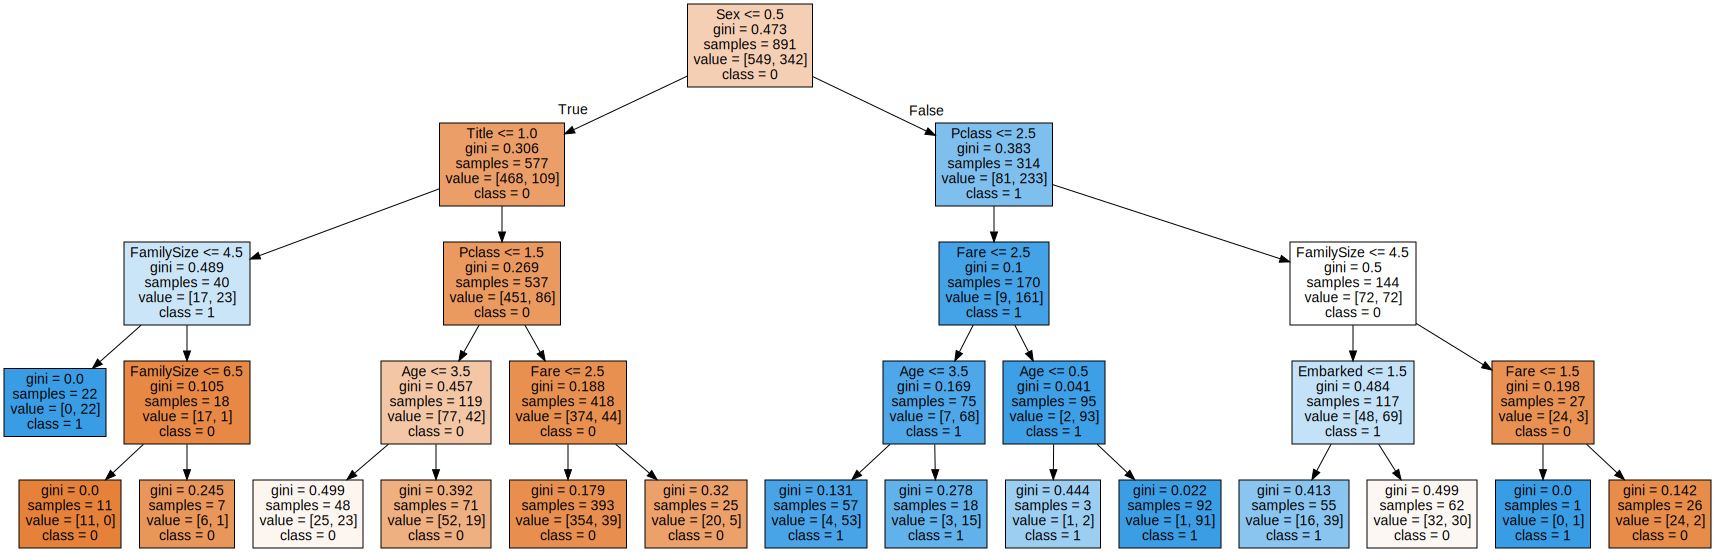

In [46]:
import graphviz
from sklearn import tree
DT = tree.export_graphviz(DTclass, out_file = None, feature_names = train.columns[1:],  
                                class_names = list(map(lambda x : str(x),DTclass.classes_)), filled=True)
graph = graphviz.Source(DT, format="png") 
graph